In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
# from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle
sns.set()

In [251]:
data = pd.read_csv('data\hypothyroid.csv')
data.shape

(3772, 30)

In [252]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative


Problem Statement :  To build a classification methodology to predict the type of Thyroid a person has ,based on the below features.

age - Age of the person

sex - Male or Female

on_thyroxine - true or false

on_antithyroid_medication - true or false

sick - true or false

pregnant - true or false

thyroid_surgery - true or false

I131_treatment - true or false

query_hypothyroid - true or false

query_hyperthyroid -true or false

lithium - true or false

goitre - true or false

tumor - true or false

hypopituitary- true or false

psych - true or false

TSH_measured - true or false

TSH - thyroid stimulating hormone floating value

T3_measured - true or false

T3 - triiodothyronine value

TT4_measured- true or false

TT4 - Thyroxine value

T4U_measured- true or false

T4U - numerical value

FTI_measured- true or false

FTI -Free Thyroxine Index

TBG_measured- true or false

TBG -Thyroid-Binding Globulin  value

referral_source - different sources of referals

Class - different types of thyroid

In [253]:
data.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,...,2,242,2,147,2,235,1,1,5,4
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,negative
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,...,3541,231,3385,387,3387,385,3772,3772,2201,3481


We can see from the data description that there are no missing values. But if you check the dataset the missing values are replaced with invalid values like '?'. Let's replace such values with 'nan' and check for missing values again.

In [254]:
for column in data.columns:
    count = data[column][data[column]=='?'].count()
    if count!=0:
        print(column, data[column][data[column]=='?'].count())
    

age 1
sex 150
TSH 369
T3 769
TT4 231
T4U 387
FTI 385
TBG 3772


So these are the columns which have missing values but missing values are replaced with '?'. We will replace these values with 'nan' and then do imputation of these missing values. 

Also, we can see thatfor column 'TBG' all the values are missing. So we will drop this column as it is of no use to us.

In [255]:
data = data.drop(['TBG'],axis =1)

Also, looking to the dataset, we can see that some columns are with true and false value are just the indication that whether the next column has values or not. Let's see an example:

In [256]:
data[['T4U_measured','T4U']] 

,T4U_measured,T4U
0,t,1.14
1,f,?
2,t,0.91
3,f,?
4,t,0.87
...,...,...
3767,f,?
3768,t,1.08
3769,t,1.07
3770,t,0.94


Since, we are any ways going to handle the missing values, there is no point of having such columns in our dataset.

Let's drop such columns as well.

In [257]:
data = data.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured'],axis =1)

In [258]:
# Now let's replace the '?' values with numpy nan
for column in data.columns:
    count = data[column][data[column]=='?'].count()
    if count!=0:
        data[column] = data[column].replace('?',np.nan)    

In [259]:
for column in data.columns:
    count = data[column][data[column]=='?'].count()
    if count==0:
        print(column, data[column][data[column]=='?'].count())    

age 0
sex 0
on_thyroxine 0
query_on_thyroxine 0
on_antithyroid_medication 0
sick 0
pregnant 0
thyroid_surgery 0
I131_treatment 0
query_hypothyroid 0
query_hyperthyroid 0
lithium 0
goitre 0
tumor 0
hypopituitary 0
psych 0
TSH 0
T3 0
TT4 0
T4U 0
FTI 0
referral_source 0
Class 0


Great!! Now that we have replaced all such values with 'nan'. Let's deal with these missing values now.

In [260]:
data["age"] = pd.to_numeric(data["age"])

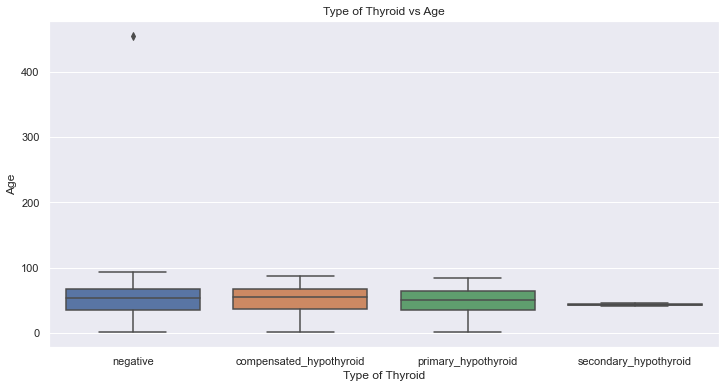

In [261]:
plt.figure(figsize=(12,6))
sns.boxplot(x = "Class", y = "age", data = data)
plt.title("Type of Thyroid vs Age")
plt.xlabel("Type of Thyroid")
plt.ylabel("Age")
plt.show()

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

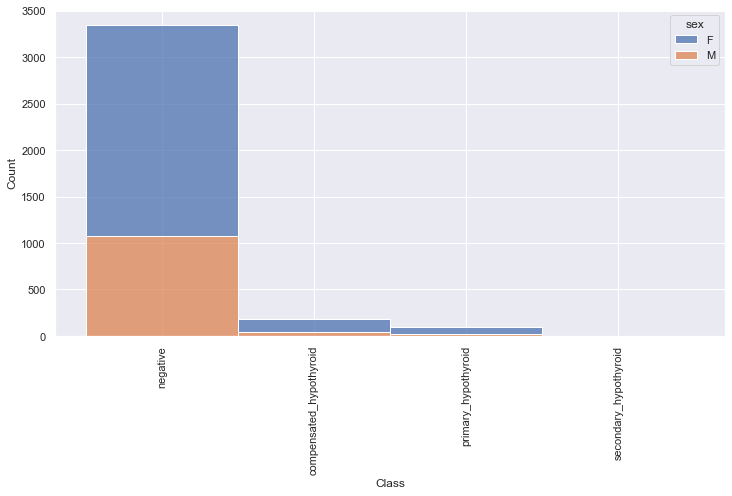

In [262]:
plt.figure(figsize=(12,6))
sns.histplot(binwidth=0.5, x="Class", hue="sex", data=data, stat="count", multiple="stack")
plt.xticks(rotation = "vertical")

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

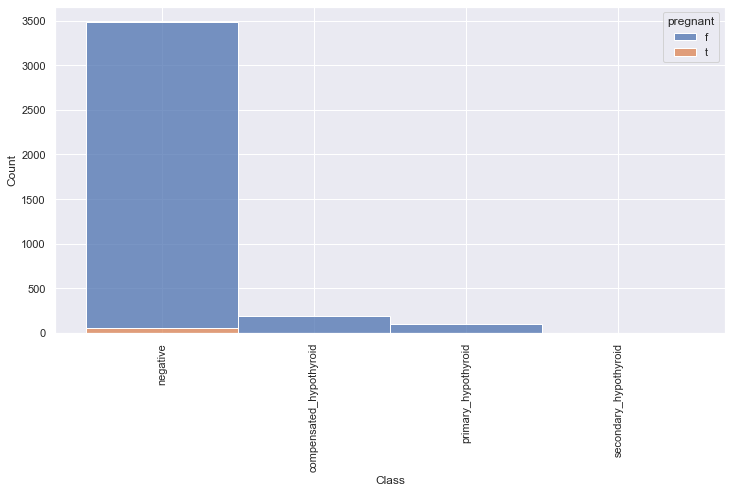

In [263]:
plt.figure(figsize=(12,6))
sns.histplot(binwidth=0.5, x="Class", hue="pregnant", data=data, stat="count", multiple="stack")
plt.xticks(rotation = "vertical")

In [264]:
data.isna().sum()

age                            1
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          369
T3                           769
TT4                          231
T4U                          387
FTI                          385
referral_source                0
Class                          0
dtype: int64

Since the values are categorical, we have to change them to numerical before we use any imputation techniques.

We can use get dummies but since most of the columns have only two distinct categories we will use mapping for them. Why? Because since there are only two categories then the two columns formed after get dummies will both have very high correaltion since they both explain the same thing. So in anyway we will have to drop one of the columns. That's why let's use mapping for such columns.
For columns with more than two categories we will use get dummies.

In [265]:
# for column in data.columns:
#     print(column, (data[column].unique()))
for column in data.columns:
    print(column)
    print(data[column].unique())

age
[ 41.  23.  46.  70.  18.  59.  80.  66.  68.  84.  67.  71.  28.  65.
  42.  63.  51.  81.  54.  55.  60.  25.  73.  34.  78.  37.  85.  26.
  58.  64.  44.  48.  61.  35.  83.  21.  87.  53.  77.  27.  69.  74.
  38.  76.  45.  36.  22.  43.  72.  82.  31.  39.  49.  62.  57.   1.
  50.  30.  29.  75.  19.   7.  79.  17.  24.  15.  32.  47.  16.  52.
  33.  13.  10.  89.  56.  20.  90.  40.  88.  14.  86.  94.  12.   4.
  11.   8.   5. 455.   2.  91.   6.  nan  93.  92.]
sex
['F' 'M' nan]
on_thyroxine
['f' 't']
query_on_thyroxine
['f' 't']
on_antithyroid_medication
['f' 't']
sick
['f' 't']
pregnant
['f' 't']
thyroid_surgery
['f' 't']
I131_treatment
['f' 't']
query_hypothyroid
['f' 't']
query_hyperthyroid
['f' 't']
lithium
['f' 't']
goitre
['f' 't']
tumor
['f' 't']
hypopituitary
['f' 't']
psych
['f' 't']
TSH
['1.3' '4.1' '0.98' '0.16' '0.72' '0.03' nan '2.2' '0.6' '2.4' '1.1' '2.8'
 '3.3' '12' '1.2' '1.5' '6' '2.1' '0.1' '0.8' '1.9' '3.1' '0.2' '13' '0.3'
 '0.035' '2.5' '0.5' '1.7

In [266]:
# We can map the categorical values like below:
data['sex'] = data['sex'].map({'F' : 0, 'M' : 1})

# except for 'Sex' column all the other columns with two categorical data have same value 'f' and 't'.
# so instead of mapping indvidually, let's do a smarter work
for column in data.columns:
    if  len(data[column].unique())==2:
        data[column] = data[column].map({'f' : 0, 't' : 1})
    elif data[column].unique().any()=='f':
         data[column] = data[column].map({'f' : 0})
    elif data[column].unique().any()=='t':
         data[column] = data[column].map({'t' : 1})
# this will map all the rest of the columns as we require. Now there are handful of column left with more than 2 categories. 


In [267]:
data['referral_source'].unique()

array(['SVHC', 'other', 'SVI', 'STMW', 'SVHD'], dtype=object)

In [268]:
numerical_cols=['age','T3','TT4','T4U','FTI']
imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)
new_array=imputer.fit_transform(data[numerical_cols]) # impute the missing values
# convert the nd-array returned in the step above to a Dataframe
new_data=pd.DataFrame(data=np.round(new_array), columns=numerical_cols)
new_data=new_data.astype(int)
new_data.dtypes
data[numerical_cols]=new_data
data[numerical_cols].dtypes

age    int32
T3     int32
TT4    int32
T4U    int32
FTI    int32
dtype: object

In [269]:
# we will use get_dummies with that.
data = pd.get_dummies(data, columns=['referral_source'])

Now our ouptut class also has 4 distinct categories. There is no sense of using get dummies with our Output class, so we will just map them.
Let's use LabelEncoder function for this.

In [270]:
data['Class'].unique()

array(['negative', 'compensated_hypothyroid', 'primary_hypothyroid',
       'secondary_hypothyroid'], dtype=object)

In [271]:
lblEn = LabelEncoder()

data['Class'] =lblEn.fit_transform(data['Class'])

In [272]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4,T4U,FTI,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41,0.0,0,0,0,0,0,0,0,0,...,2,125,1,109,1,0,1,0,0,0
1,23,0.0,0,0,0,0,0,0,0,0,...,2,102,1,102,1,0,0,0,0,1
2,46,1.0,0,0,0,0,0,0,0,0,...,2,109,1,120,1,0,0,0,0,1
3,70,0.0,1,0,0,0,0,0,0,0,...,2,175,1,177,1,0,0,0,0,1
4,70,0.0,0,0,0,0,0,0,0,0,...,1,61,1,70,1,0,0,0,1,0


In [273]:
data.describe(include='all')

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4,T4U,FTI,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
count,3772.000000,3622.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,...,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,51.737540,0.315295,0.123012,0.013256,0.011400,0.038971,0.014051,0.014051,0.015642,0.062036,...,2.025716,108.319724,1.020944,110.204931,0.974814,0.029692,0.102333,0.010339,0.274125,0.583510
std,20.082554,0.464698,0.328494,0.114382,0.106174,0.193552,0.117716,0.117716,0.124101,0.241253,...,0.784784,34.861922,0.165546,32.425230,0.279508,0.169760,0.303126,0.101169,0.446131,0.493042
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,88.000000,1.000000,93.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,104.000000,1.000000,107.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,67.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,124.000000,1.000000,123.250000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000


In [274]:
# for column in data.columns:
#     print(column, (data[column].unique()))

Great! Now that we have encoded all our Categorical values. Let's start with imputing the missing values.

In [275]:
data.dtypes

age                            int32
sex                          float64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
sick                           int64
pregnant                       int64
thyroid_surgery                int64
I131_treatment                 int64
query_hypothyroid              int64
query_hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH                           object
T3                             int32
TT4                            int32
T4U                            int32
FTI                            int32
Class                          int32
referral_source_STMW           uint8
referral_source_SVHC           uint8
referral_source_SVHD           uint8
referral_source_SVI            uint8
referral_source_other          uint8
d

In [276]:
# imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)
# new_array=imputer.fit_transform(data) # impute the missing values
#     # convert the nd-array returned in the step above to a Dataframe
# new_data=pd.DataFrame(data=np.round(new_array), columns=data.columns)

In [277]:
# new_data.describe()

In [278]:
# new_data.isna().sum()

In [279]:
# new_data.dtypes

Great! Now there are no missing values in our new dataset. 


Let's check the distribution for our continous data in the dataset:

In [280]:
# columns = ['age','TSH','T3','TT4','T4U','FTI']

# plot.figure(figsize=(10,15),facecolor='white')
# plotnumber = 1

# for column in columns:
#     ax = plot.subplot(3,2,plotnumber)
#     sns.distplot(new_data[column])
#     plot.xlabel(column,fontsize=10)
#     plotnumber+=1
# plot.show()

The graphs for age, TSH and T3 looks heavely skewed towards left. Let's do some transformations to the data and see if it improves the plot.

Before doing log transformation , let's add 1 to each valuue in the column to handle exception when we try to find log of '0'.

In [281]:
# columns = ['age','TSH','T3','TT4','T4U','FTI']

# plot.figure(figsize=(10,15),facecolor='white')
# plotnumber = 1

# for column in columns:
#     data[column]+=1
#     ax = plot.subplot(3,2,plotnumber)
# #     sns.distplot(np.log(data[column]))
#     plot.xlabel(column,fontsize=10)
#     plotnumber+=1
# plot.show()


After log transformation, rest of the columns look fine but 'TSH' has a weird trend.

It won't give much of information so let's drop this column.

In [282]:
# new_data = new_data.drop(['TSH'],axis=1)


#### let's see how balanced our dataset in terms of given target classes:

In [283]:
# let's see how data is distributed for every column for every individual id
# the graph plot below is for individual ids. Press 1 in the  input box below the graph to continue viewing graph for each id!!

# plot.figure(figsize=(20,25), facecolor='white')
# plotnumber = 1
# plt_data = data.drop(['age'], axis =1)

# for column in plt_data:
#     ax = plot.subplot(6,5,plotnumber)
#     sns.countplot(plt_data[column])
#     plot.xlabel(column,fontsize=10)
#     plotnumber+=1
# plot.show()


# sns.countplot(new_data['Class'])
        
    

We can clerly see that the dataset is highly imbalanced. 

We will use a python library known as imbalanced-learn to deal with imbalanced data.
Imbalanced learn has an algorithm called RandomOverSampler. We will use different techniques in another projects. 
You can study more about different techniques below.

Note: https://pypi.org/project/imbalanced-learn/

https://github.com/scikit-learn-contrib/imbalanced-learn


Also, ensemble techniques are well versed in handling such imbalanced data. But for the sake of learning we will see how such issues are dealt with.

In [284]:
# cat = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
# sm = SMOTENC(categorical_features = cat,sampling_strategy='minority',k_neighbors=3)

In [285]:
# kmsmote=KMeansSMOTE()

In [286]:
# x = new_data.drop(['Class'],axis=1)
# y = new_data['Class']
# rdsmple = RandomOverSampler()
# x_sampled,y_sampled  = rdsmple.fit_sample(x,y)

In [287]:
# x_sampled,y_sampled = kmsmote.fit_sample(x,np.asarray(y))

In [288]:
# rdsmple = RandomOverSampler()
# x_sampled,y_sampled  = rdsmple.fit_sample(x,y)

In [289]:
# x_sampled.shape

In [290]:
# x_sampled = pd.DataFrame(data = x_sampled, columns = x.columns)

In [291]:
# x_sampled

In [292]:
# sns.countplot(y_sampled)       
    

Great! Our dataset looks balanced now. We can go ahead with training our model on this data.

In [293]:
cat_data = data.drop(['age','T3','TT4','T4U','FTI','Class'],axis=1)
cat_cols=cat_data.columns
X = data.drop(['Class'],axis=1)
y=data['Class']
    ## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('scaler',StandardScaler())

    ]

)

# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('scaler',StandardScaler())
    ]

)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,cat_cols)
])

In [294]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [295]:
X_train

array([[-1.951657  , -0.04900304, -0.5578815 , ..., -0.09578263,
        -0.60243869,  0.83139857],
       [ 1.17940208, -1.32987462,  0.98999781, ..., -0.09578263,
         1.65991996, -1.20279255],
       [-0.55472295,  1.23186854,  0.76068236, ..., -0.09578263,
        -0.60243869, -1.20279255],
       ...,
       [ 0.45684998, -0.04900304,  0.35938031, ..., -0.09578263,
        -0.60243869,  0.83139857],
       [ 0.8422111 , -0.04900304, -0.75853253, ..., -0.09578263,
         1.65991996, -1.20279255],
       [ 0.6013604 ,  1.23186854,  0.41670918, ..., -0.09578263,
        -0.60243869, -1.20279255]])

In [296]:
np.unique(X_test)

array([-6.42103833e+00, -3.28938472e+00, -3.25912718e+00, -3.13809700e+00,
       -3.10783946e+00, -3.07758191e+00, -3.05168707e+00, -3.04732437e+00,
       -3.02302264e+00, -3.01706683e+00, -2.93702934e+00, -2.92629419e+00,
       -2.89603665e+00, -2.83552156e+00, -2.82237161e+00, -2.80526402e+00,
       -2.79370718e+00, -2.77500647e+00, -2.76504275e+00, -2.73637832e+00,
       -2.71449138e+00, -2.70771389e+00, -2.67904946e+00, -2.62172059e+00,
       -2.61074620e+00, -2.56439173e+00, -2.56320366e+00, -2.50706287e+00,
       -2.47839843e+00, -2.47243103e+00, -2.43335840e+00, -2.42106957e+00,
       -2.38518826e+00, -2.35140086e+00, -2.27774741e+00, -2.24908298e+00,
       -2.23037068e+00, -2.22041855e+00, -2.14433756e+00, -2.13442525e+00,
       -2.09616742e+00, -2.07908296e+00, -2.04843196e+00, -1.99110309e+00,
       -1.96243866e+00, -1.95805278e+00, -1.92779524e+00, -1.90348686e+00,
       -1.85531672e+00, -1.84778093e+00, -1.83702261e+00, -1.81911650e+00,
       -1.80714658e+00, -

In [297]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
dtree.score(X_test,y_test)

0.9946996466431095

In [298]:
predictions_test = lblEn.inverse_transform(dtree.predict(X_test))
np.unique(predictions_test)

array(['compensated_hypothyroid', 'negative', 'primary_hypothyroid'],
      dtype=object)

In [299]:
pickle.dump(dtree,open('C:/Users/Rohit/Desktop/IMCC/projects/Thyroid-project/src/thyroid.pkl','wb'))

In [308]:
for i in data[['age','sick']]:
      print(i)


age
sick


In [300]:
data[numerical_cols]

,age,T3,TT4,T4U,FTI
0,41,2,125,1,109
1,23,2,102,1,102
2,46,2,109,1,120
3,70,2,175,1,177
4,70,1,61,1,70
...,...,...,...,...,...
3767,30,2,113,1,105
3768,68,2,124,1,114
3769,74,2,112,1,105
3770,72,2,82,1,87


In [301]:
data.describe(include='all')

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4,T4U,FTI,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
count,3772.000000,3622.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,...,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,51.737540,0.315295,0.123012,0.013256,0.011400,0.038971,0.014051,0.014051,0.015642,0.062036,...,2.025716,108.319724,1.020944,110.204931,0.974814,0.029692,0.102333,0.010339,0.274125,0.583510
std,20.082554,0.464698,0.328494,0.114382,0.106174,0.193552,0.117716,0.117716,0.124101,0.241253,...,0.784784,34.861922,0.165546,32.425230,0.279508,0.169760,0.303126,0.101169,0.446131,0.493042
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,88.000000,1.000000,93.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,104.000000,1.000000,107.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,67.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,124.000000,1.000000,123.250000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
